In [22]:
import pandas as pd

# Load the data
file_path = './y_reverse_concat.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

# Drop the unnecessary 'Unnamed: 0' column and set 'date' as index
data = data.drop(columns=['Unnamed: 0']).set_index('date')

# Calculate the mean for each 'y_rate_<time>' column
mean_values = data.mean()

mean_values

sum_values = data.sum()


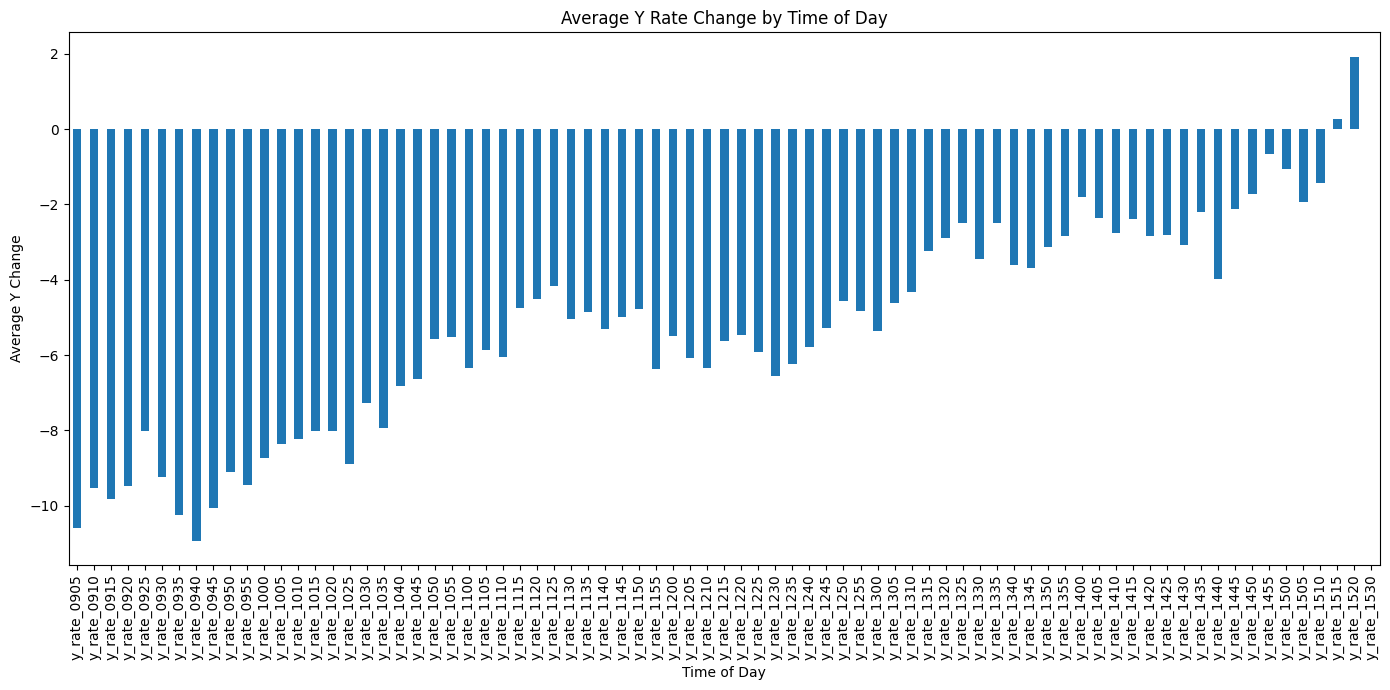

In [23]:
import matplotlib.pyplot as plt
# Plotting the mean values
plt.figure(figsize=(14, 7))
mean_values.plot(kind='bar')
plt.title('Average Y Rate Change by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Y Change')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


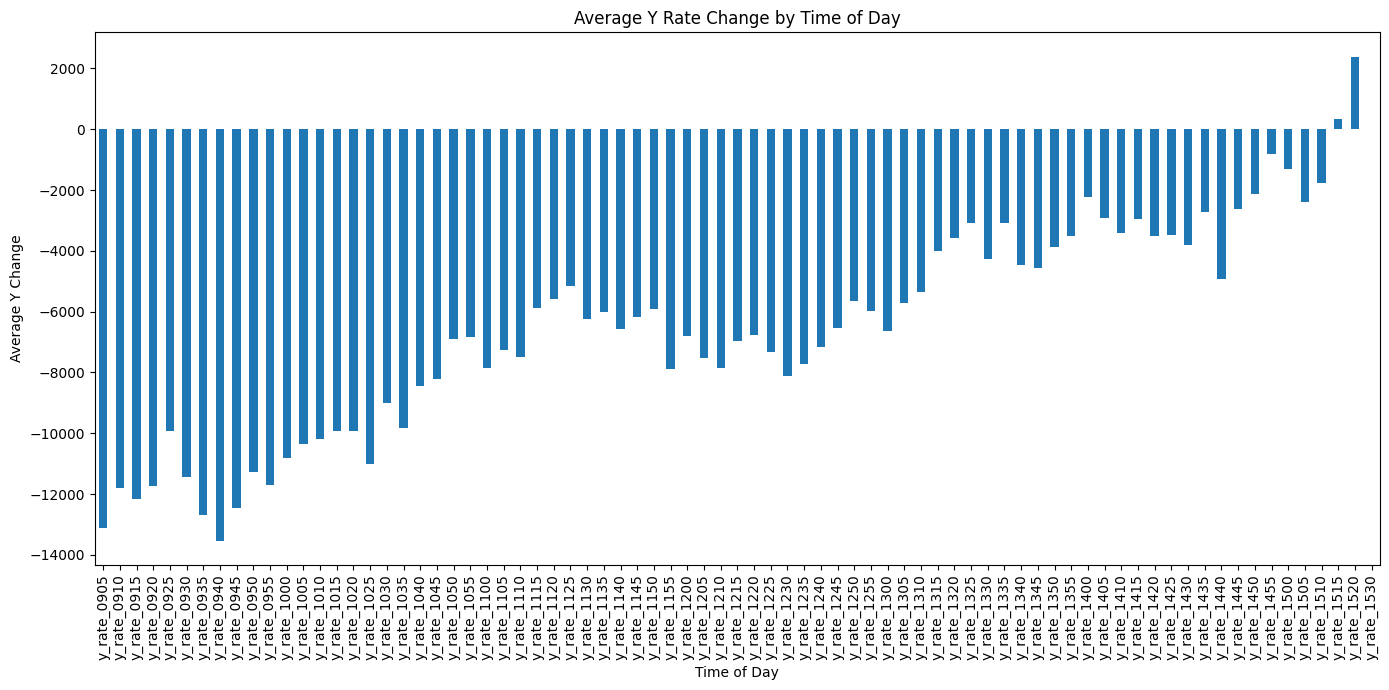

In [24]:
import matplotlib.pyplot as plt

# Plotting the mean values
plt.figure(figsize=(14, 7))
sum_values.plot(kind='bar')
plt.title('Average Y Rate Change by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Y Change')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [36]:
df = pd.read_csv('./y_diff_concat.csv',index_col= 0 )

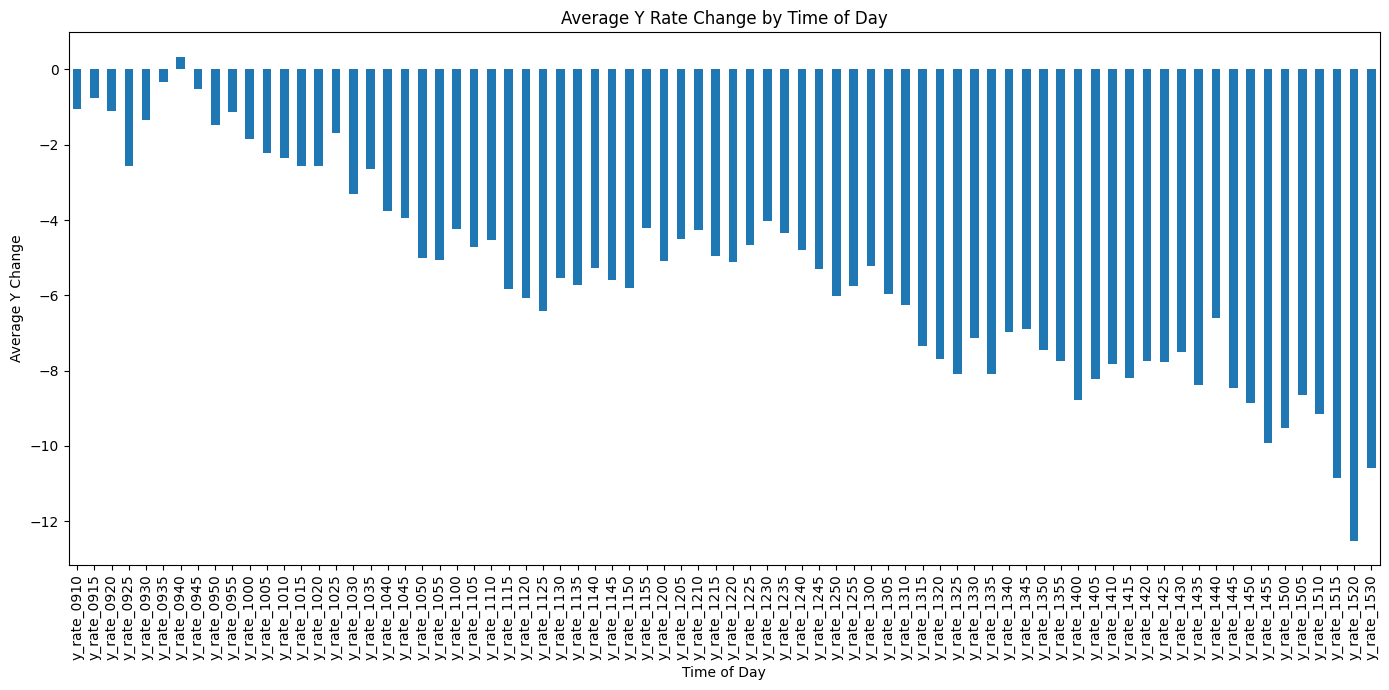

In [48]:
import matplotlib.pyplot as plt
df_mean = df.mean()
# Plotting the mean values
plt.figure(figsize=(14, 7))
df_mean.plot(kind='bar', stacked= True)
plt.title('Average Y Rate Change by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Y Change')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


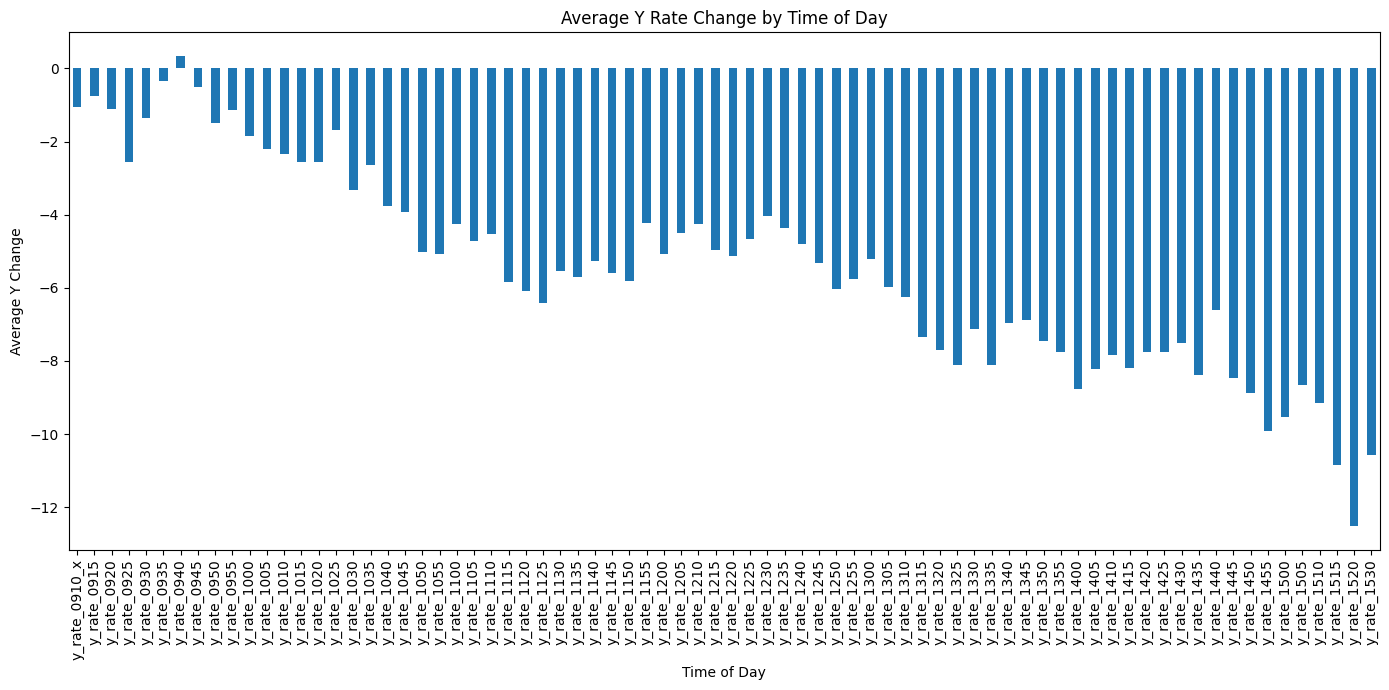

In [21]:
import matplotlib.pyplot as plt
sum_df = df.mean()
# Plotting the mean values
plt.figure(figsize=(14, 7))
sum_df.plot(kind='bar')
plt.title('Average Y Rate Change by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Y Change')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

<Axes: title={'center': 'Comparison of Average Values for Each Time Slot'}, xlabel='Time'>

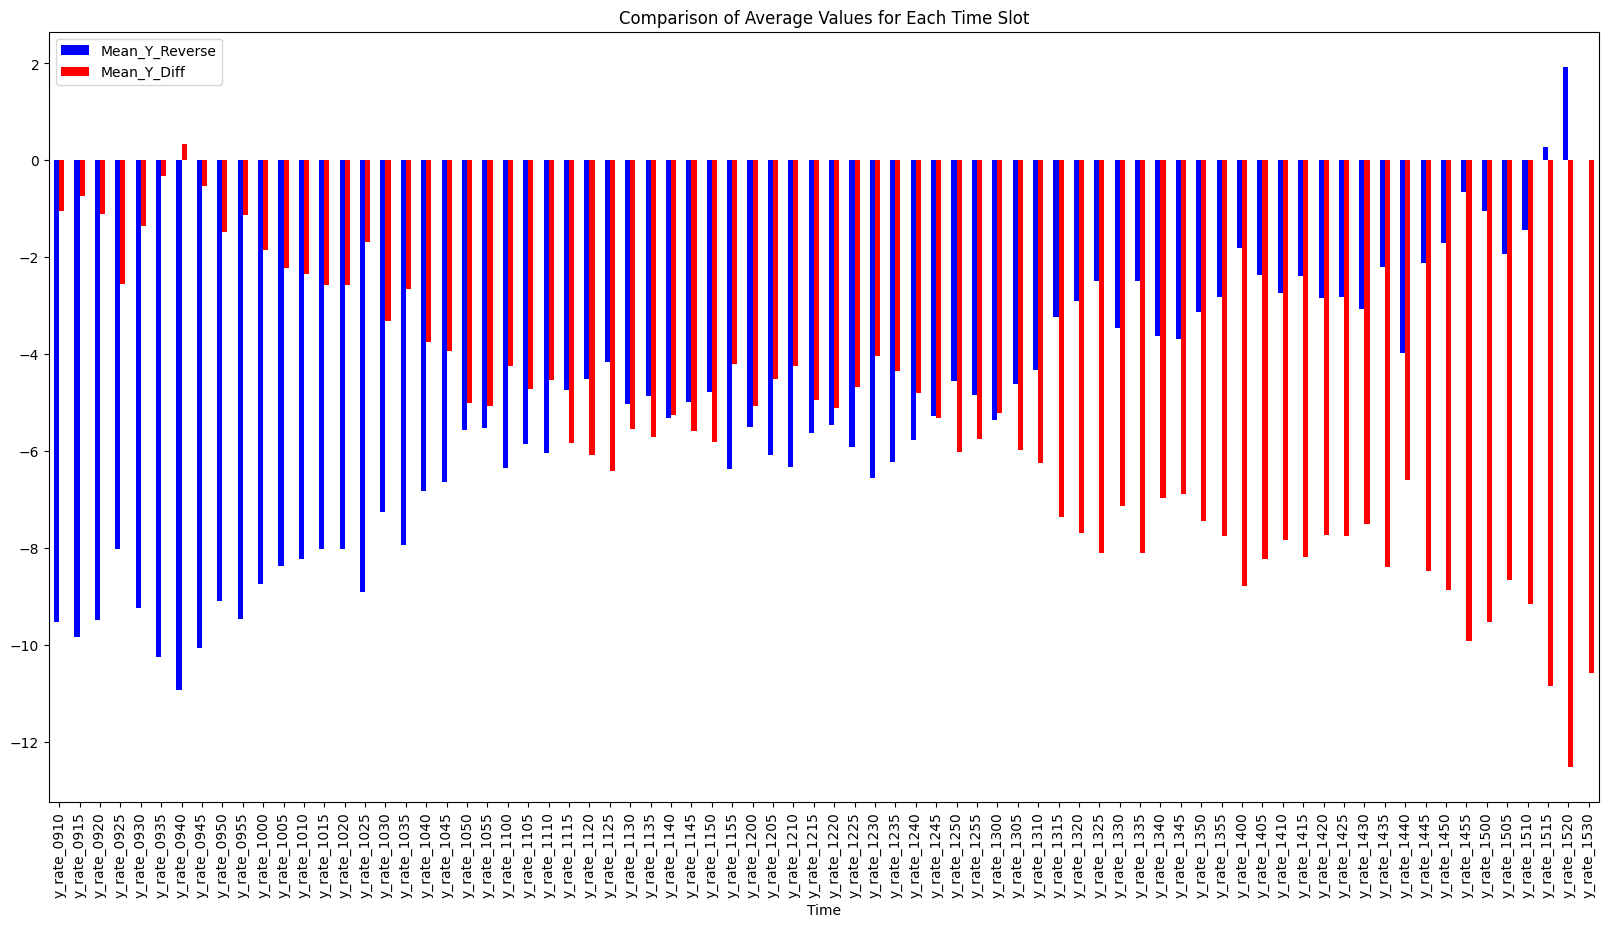

In [40]:
import pandas as pd

# Load the CSV files into DataFrames
df_y_reverse = pd.read_csv('./y_reverse_concat.csv')
df_y_diff = pd.read_csv('./y_diff_concat.csv')

# Display the first few rows of each DataFrame
df_y_reverse_head = df_y_reverse.head()
df_y_diff_head = df_y_diff.head()

df_y_reverse_head, df_y_diff_head
# Find the common columns between the two dataframes except for the 'date' column
common_columns = df_y_reverse.columns.intersection(df_y_diff.columns).tolist()
common_columns.remove('date')  # Removing 'date' column as we do not need to compare dates

# Now we will create a summary DataFrame to compare the means of these columns for both dataframes
# This is a simplification to avoid creating an overly complex bar graph
summary_df = pd.DataFrame({
    'Time': common_columns,
    'Mean_Y_Reverse': df_y_reverse[common_columns].mean(),
    'Mean_Y_Diff': df_y_diff[common_columns].mean()
})

# We can now plot this summary DataFrame
summary_df.set_index('Time', inplace=True)
summary_df.plot(kind='bar', figsize=(20, 10), color=['blue', 'red'], title='Comparison of Average Values for Each Time Slot')


<Axes: title={'center': 'Comparison of Average Values for Each Time Slot'}, xlabel='Time'>

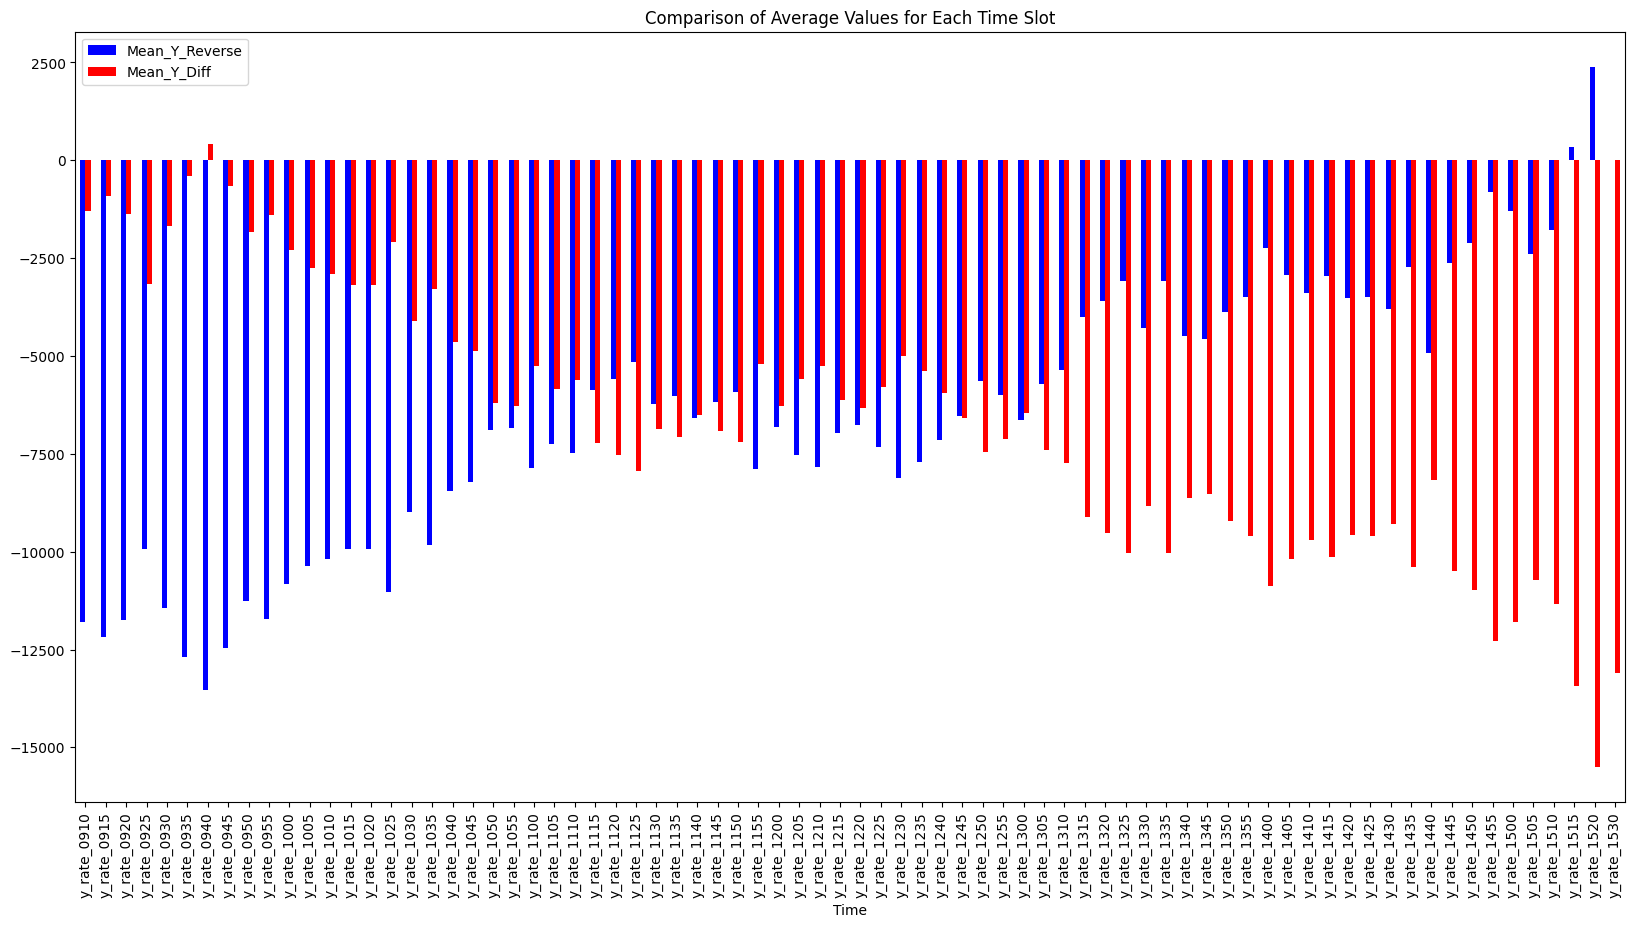

In [41]:
import pandas as pd

# Load the CSV files into DataFrames
df_y_reverse = pd.read_csv('./y_reverse_concat.csv')
df_y_diff = pd.read_csv('./y_diff_concat.csv')

# Display the first few rows of each DataFrame
df_y_reverse_head = df_y_reverse.head()
df_y_diff_head = df_y_diff.head()

df_y_reverse_head, df_y_diff_head
# Find the common columns between the two dataframes except for the 'date' column
common_columns = df_y_reverse.columns.intersection(df_y_diff.columns).tolist()
common_columns.remove('date')  # Removing 'date' column as we do not need to compare dates

# Now we will create a summary DataFrame to compare the means of these columns for both dataframes
# This is a simplification to avoid creating an overly complex bar graph
summary_df = pd.DataFrame({
    'Time': common_columns,
    'Mean_Y_Reverse': df_y_reverse[common_columns].sum(),
    'Mean_Y_Diff': df_y_diff[common_columns].sum()
})

# We can now plot this summary DataFrame
summary_df.set_index('Time', inplace=True)
summary_df.plot(kind='bar', figsize=(20, 10), color=['blue', 'red'], title='Comparison of Average Values for Each Time Slot')


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/average_values_difference.png'

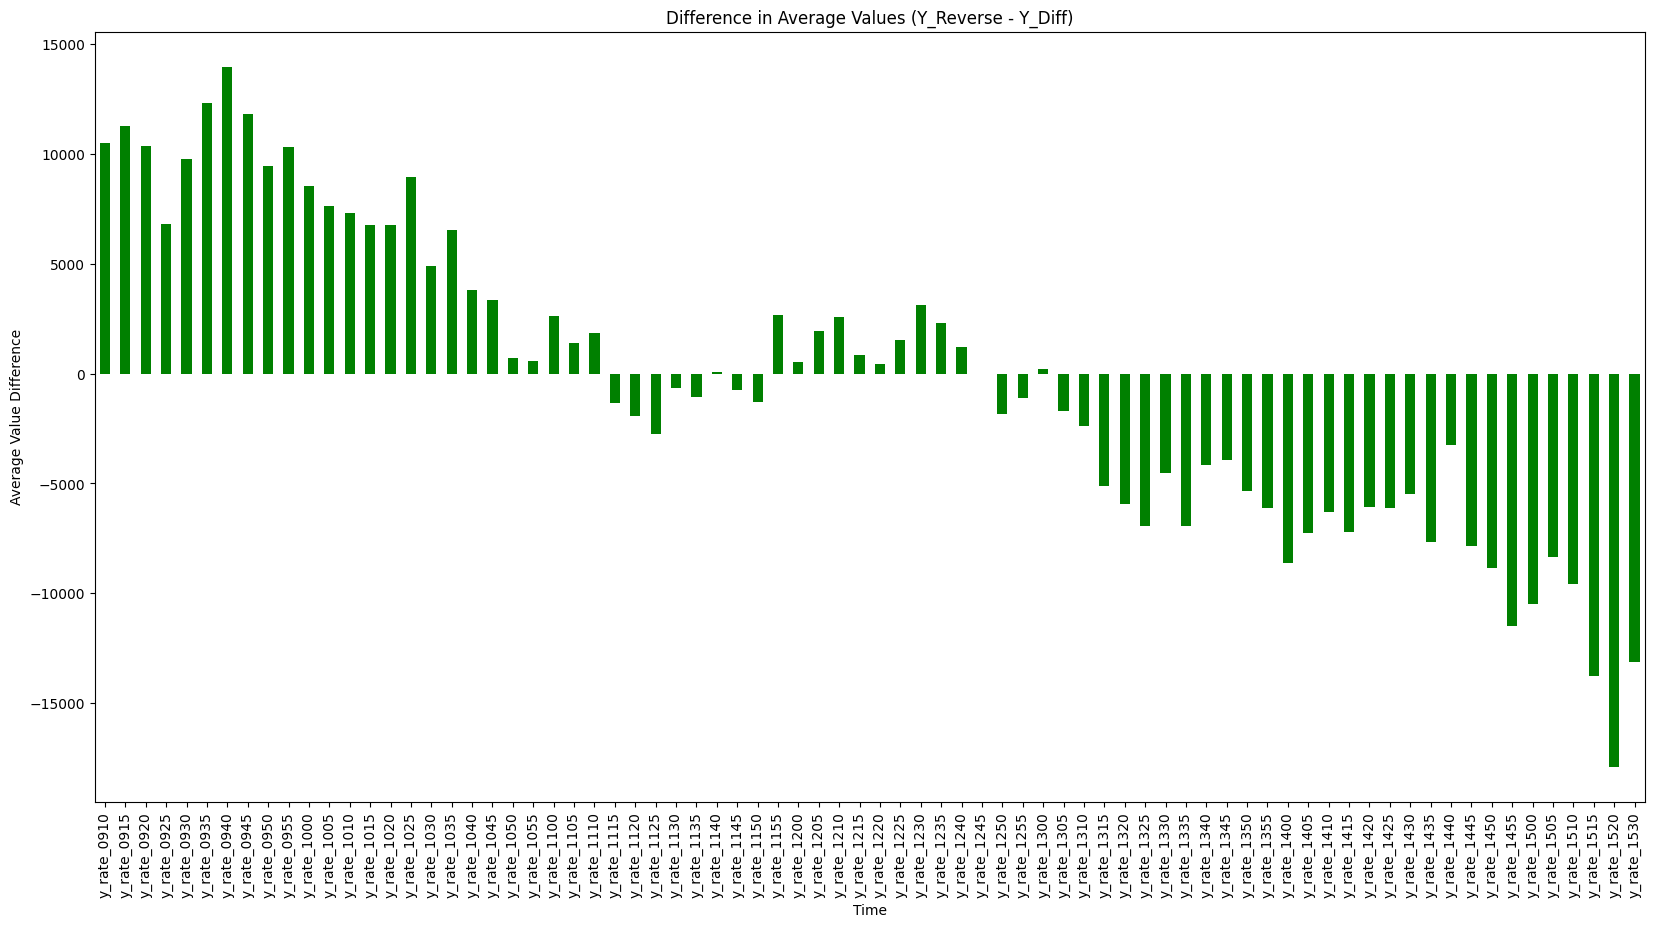

In [47]:
# Calculate the difference in average values between df_y_reverse and df_y_diff for the same time slots
summary_df['Difference'] = summary_df['Mean_Y_Reverse']* -1 + (summary_df['Mean_Y_Diff'])

# Plot the difference
ax_diff = summary_df['Difference'].plot(kind='bar', figsize=(20, 10), color='green', title='Difference in Average Values (Y_Reverse - Y_Diff)')
ax_diff.set_xlabel('Time')
ax_diff.set_ylabel('Average Value Difference')

# Return the figure
ax_diff.figure.savefig('/mnt/data/average_values_difference.png')  # Saving the figure
ax_diff.figure.show()  # Show the figure
